In [4]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Loading data as a dataframe.

In [6]:
san_francisco = pd.read_csv("./datasets/Flood_Health_Decintile_Sort.csv")
from scipy import stats
#san_francisco = san_francisco[(np.abs(stats.zscore(san_francisco)) < 3).all(axis=1)] #Gets rid of outliers
san_francisco.head()

,Census Blockgroup,Children,Elderly,NonWhite,Poverty,Education,English,Elevation,SeaLevelRise,Precipitation,Diabetes,MentalHealth,Asthma,Disability,HousingViolations,Homeless,LivAlone,FloodHealthIndex,Decintiles,FloodHealthIndex_Quintiles
0,60759809001,0.072957,8.037850e-10,0.599175,0.356678,0.996080,0.150559,-6.00000,0.182261,0.035771,22.0584,36.5200,15.1339,0.133608,14.10930,17.5025,0.480591,84.8190,10,5
1,60750201001,0.079893,1.240000e-01,0.651000,0.509706,0.724000,0.232000,7.83292,0.000000,0.020516,16.0115,62.0535,10.5741,0.238000,10.24060,15.8921,0.522000,83.4860,10,5
2,60750117001,0.027149,1.030000e-01,0.697000,0.378595,0.862000,0.171000,-1.99906,0.106609,0.005321,1.4068,98.5924,0.8008,0.187000,39.56220,4.9374,0.635000,83.4791,10,5
3,60750178021,0.084215,8.800000e-02,0.584000,0.327362,0.843000,0.119000,-5.96629,0.064579,0.024166,14.9856,54.0699,9.5802,0.229000,7.04366,19.2683,0.427000,82.4925,10,5
4,60750125012,0.095332,2.219991e-01,0.726001,0.794750,0.694997,0.202999,7.13278,0.000000,0.004105,15.5000,63.7499,12.9672,0.424998,13.72550,14.6184,0.731997,81.8061,10,5


Basic Statistics

In [7]:
san_francisco.describe().drop("count", axis=0)

,Census Blockgroup,Children,Elderly,NonWhite,Poverty,Education,English,Elevation,SeaLevelRise,Precipitation,Diabetes,MentalHealth,Asthma,Disability,HousingViolations,Homeless,LivAlone,FloodHealthIndex,Decintiles,FloodHealthIndex_Quintiles
mean,6.075033e+10,0.131671,1.430411e-01,0.567669,0.271585,0.869517,0.124782,124.147322,0.010224,0.007366,8.317175,19.953382,4.748124,1.034424e-01,6.021817,4.713140,0.347597,49.569516,5.768166,3.000000
std,8.011773e+05,0.057074,6.102362e-02,0.213813,0.154539,0.108676,0.108760,104.939767,0.050148,0.014039,6.101610,15.429652,3.384794,5.513568e-02,8.160820,5.726493,0.148501,13.343632,2.724475,1.416662
min,6.075010e+10,0.007243,8.037850e-10,0.128998,0.057373,0.363000,0.000000,-42.000000,0.000000,0.000000,0.000000,0.051100,0.000000,1.050660e-09,0.000000,0.260200,0.062731,19.293200,1.000000,1.000000
25%,6.075017e+10,0.089490,1.020000e-01,0.403000,0.165123,0.814500,0.046000,35.303625,0.000000,0.000816,4.300800,9.040000,2.710900,7.424997e-02,2.830483,0.520700,0.227000,39.561450,3.000000,2.000000
50%,6.075025e+10,0.133925,1.390000e-01,0.565000,0.234190,0.899000,0.104500,111.691500,0.000000,0.002560,6.428200,14.280000,3.823850,9.378748e-02,4.763075,3.131250,0.325000,47.929400,6.000000,3.000000
75%,6.075033e+10,0.170120,1.730000e-01,0.721750,0.331840,0.954001,0.180500,183.484250,0.000000,0.007140,11.200000,26.817075,5.460375,1.150000e-01,7.256355,4.615400,0.458551,58.226175,8.000000,4.000000
max,6.075981e+10,0.452256,5.540000e-01,0.981456,0.840098,1.000999,0.715007,558.279000,0.503456,0.155139,97.368700,98.592400,16.115600,4.520000e-01,170.940000,19.268300,0.732000,84.819000,10.000000,5.000000


Decision Tree Model to predict Quintile

In [42]:
from sklearn.tree import DecisionTreeRegressor


san_francisco_features_Q = list(san_francisco.columns[1:-3])
X_Q = san_francisco[san_francisco_features_Q].sample(460)
y_q = san_francisco.Decintiles[X_Q.index]

flood_index_Q_model = DecisionTreeRegressor(random_state=1)
flood_index_Q_model.fit(X_Q, y_q)

features_Q = san_francisco[san_francisco_features_Q]
predicted_indices_Q = flood_index_Q_model.predict(features_Q)
indices_Q = san_francisco.Decintiles
(sum(indices_Q == predicted_indices_Q) - 460)/(578-460)

0.4915254237288136

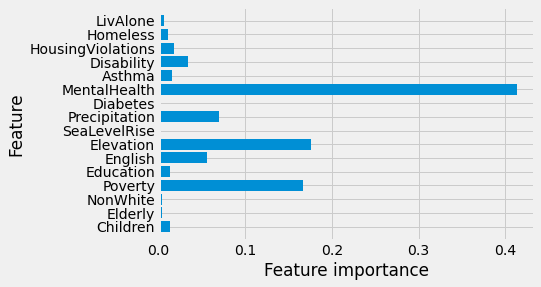

In [354]:
def plot_feature_importances(model): #model is fit classifier
    # extractibg the number of predictive feature variables(columns)
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.show()

plot_feature_importances(flood_index_Q_model)

Testing for highest accuracy leaf nodes for Quintile.

In [109]:
# def obtain_training_set(table, columns_chosen, y_value):
#     """Create a training set."""
#     table_features = list(table[columns_chosen])
#     train_amount = round(len(table.index) * 0.8)
#     X = table[table_features].sample(train_amount)
#     y = table[y_value][X.index]
#     return X, y

def find_best_leaf_node(nodes, train_X, val_X, train_y, val_y, trained) -> list:
    """To find best leaf node."""
    flood_index_model = DecisionTreeRegressor(random_state=1, )
    flood_index_model.fit(train_X, train_y)
    predicted_indices = flood_index_model.predict(val_X)

    return (((sum(val_y == predicted_indices)) + (sum((val_y+1) == predicted_indices)) + (sum((val_y-1) == predicted_indices))) - trained)/(round(len(val_X)-trained))   

In [321]:
nodes_tested = 20
results_table = pd.DataFrame(columns=["Nodes", "Accuracy"])
train_amount = round(len(san_francisco.index) * 0.8)
best_depth = []
for i in np.arange(10):
    for i in np.arange(0.1, nodes_tested, 0.01):
        train_X, train_y = obtain_training_set(san_francisco, san_francisco_features_Q, "FloodHealthIndex_Quintiles")
        percentage_accuracy = find_best_leaf_node(i, train_X, features_Q,train_y, indices_Q, train_amount)
        results_table.loc[len(results_table.index)] = [i, percentage_accuracy]
    best_depth = np.append(best_depth, results_table.sort_values(by="Accuracy", ascending=False).iloc[0][0])

best_depth

array([18.78, 18.78, 15.75, 15.75, 15.75, 15.75, 17.09, 17.09, 17.09,
       17.09])

In [10]:
highest_accuracy = results_table.sort_values(by="Accuracy", ascending=False)
highest_accuracy = highest_accuracy[highest_accuracy['Accuracy'] >= .75]
highest_accuracy = highest_accuracy[highest_accuracy['Nodes'] >= 14]
highest_accuracy

NameError: name 'results_table' is not defined

In [121]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr
columns = list(san_francisco.columns)[1:-3]
fhi = san_francisco[['FloodHealthIndex']]

correlationType  = dict()
significant_metrics = {}
for column in columns:
    non_linear_corr, p1 = spearmanr(fhi, san_francisco[column])
    linear_corr, p2 = pearsonr(san_francisco[column], fhi)
    if abs(non_linear_corr) > abs(linear_corr[0]):
        larger_corr = non_linear_corr
        correlationType.update({column: "nonlinear"})
    else:
        larger_corr = linear_corr[0]
        correlationType.update({column: "linear"})
    
    if abs(larger_corr) >= .3:
        significant_metrics[column] = larger_corr

    
    print(f"{column}: {larger_corr} ({correlationType[column]})")
print(significant_metrics)

Children: -0.26308733248861554 (nonlinear)
Elderly: 0.07791234487601838 (linear)
NonWhite: 0.47987912437901153 (nonlinear)
Poverty: 0.693046296055 (nonlinear)
Education: -0.5637919102587562 (linear)
English: 0.5150096592691067 (nonlinear)
Elevation: -0.6729305040032092 (nonlinear)
SeaLevelRise: 0.2892299805806113 (nonlinear)
Precipitation: 0.30912072247333705 (linear)
Diabetes: 0.5802448846886352 (nonlinear)
MentalHealth: 0.6621334818266624 (nonlinear)
Asthma: 0.6263732563188594 (nonlinear)
Disability: 0.5605332023005422 (linear)
HousingViolations: 0.20879543570571726 (linear)
Homeless: 0.614698873917741 (nonlinear)
LivAlone: 0.3023663102717023 (linear)
{'NonWhite': 0.47987912437901153, 'Poverty': 0.693046296055, 'Education': -0.5637919102587562, 'English': 0.5150096592691067, 'Elevation': -0.6729305040032092, 'Precipitation': 0.30912072247333705, 'Diabetes': 0.5802448846886352, 'MentalHealth': 0.6621334818266624, 'Asthma': 0.6263732563188594, 'Disability': 0.5605332023005422, 'Homeles

In [127]:
features_improved = list(significant_metrics.keys())
features_test = ['Poverty', 'MentalHealth', 'Elevation', 'Precipitation', 'English', 'Disability']
features_input = san_francisco[features_improved]

accuracies = []
for i in np.arange(10):
    train_X, train_y = obtain_training_set(san_francisco, features_improved, "Decintiles")
    percentage_accuracy = find_best_leaf_node(i, train_X, features_input,train_y, indices_Q, train_amount)
    print(percentage_accuracy)
    accuracies = np.append(accuracies, percentage_accuracy)

np.mean(accuracies)

0.7327586206896551
0.8706896551724138
0.8706896551724138
0.8103448275862069
0.8275862068965517
0.8103448275862069
0.853448275862069
0.7672413793103449
0.7931034482758621
0.7672413793103449


0.8103448275862067

In [179]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier


X = san_francisco[list(significant_metrics.keys())] #
y = san_francisco[['Decintiles']] #
accuracy = []

for i in range(1, 50):
    height_accuracy = []
    for j in range(30):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        clf = DecisionTreeClassifier(max_depth=i, criterion="entropy") 
        scaler = StandardScaler() 
        scaler.fit(X_train)
        X_train = scaler.transform(X_train) 
        X_test = scaler.transform(X_test) 
        clf.fit(X_train, np.ravel(y_train,order='C')) 
        y_pred = clf.predict(X_test)
        height_accuracy.append(metrics.accuracy_score(y_test, y_pred) + metrics.accuracy_score(y_test, [x+1 for x in y_pred]) + metrics.accuracy_score(y_test, [x-1 for x in y_pred]))
        #print(accuracy[i-1])
    accuracy.append(sum(height_accuracy)/len(height_accuracy))

# print("Average Accuracy:",sum(accuracy)/len(accuracy))
print(accuracy.index(max(accuracy)), max(accuracy))

14 0.7939655172413792
